#### 1) Relacione a variável independente "GrLivArea"com a variável dependente "SalePrice":

In [2]:
import pandas as pd

data = pd.read_csv("train.csv")

gla = data["GrLivArea"].values
sp = data["SalePrice"].values

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<p> (a) Qual o intercepto?

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(gla.reshape(-1,1), sp)

intercepto = model.intercept_
intercepto

[[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]]


<p>(b) Qual o coeficiente relacionado à variável independente? 

In [4]:
model.coef_

array([107.13035897])

<p>(c) O quanto uma unidade de GrLivArea influencia no SalePrice?


In [5]:
107.13


107.13

<p>(d) Mostre o diagrama de dispersão dos dados

Text(0, 0.5, 'SalePrice')

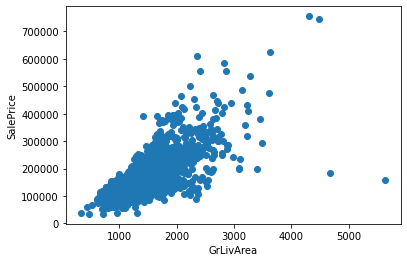

In [6]:
import matplotlib.pyplot as plt

plt.scatter(gla, sp)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

<p> (e)Coloque a reta de regressão no diagrama de dispersão


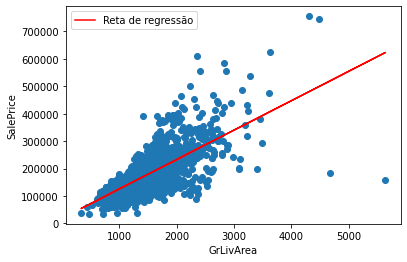

In [7]:
coeficiente_angular = model.coef_[0]
coeficiente_linear = model.intercept_
reta = coeficiente_angular * gla + coeficiente_linear

plt.scatter(gla, sp)
plt.plot(gla, reta, label="Reta de regressão", color='red')
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()

<p>(f) Faça a previsão para os dados de treino

In [8]:
predict = model.predict(gla.reshape(-1,1))
pd.DataFrame(predict)

,0
0,201761.939688
1,153767.538871
2,209903.846969
3,202511.852201
4,254041.554863
...,...
1455,195012.727073
1456,240650.259993
1457,269254.065837
1458,134055.552822


<p>(g) Calcule os resíduos para o conjunto de treino

In [9]:
residuos = pd.DataFrame(sp - predict, columns=["Residuos"])
residuos

,Residuos
0,6738.060312
1,27732.461129
2,13596.153031
3,-62511.852201
4,-4041.554863
...,...
1455,-20012.727073
1456,-30650.259993
1457,-2754.065837
1458,8069.447178


<p>(h) Faça um histograma dos resíduos

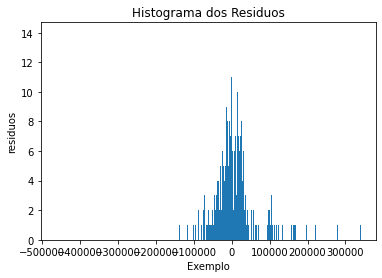

In [10]:
plt.title('Histograma dos Residuos')
plt.xlabel('Exemplo')
plt.ylabel('residuos')
plt.hist(residuos, 2000)

plt.show()

<p>(i) Faça a previsão para o conjunto de teste

In [11]:
test = pd.read_csv("test.csv")
test_ids = test["Id"].values
test = test["GrLivArea"].values
test_predict = model.predict(test.reshape(-1,1))
test_predict = {'Id': test_ids, 'SalePrice': test_predict}
pd.DataFrame(test_predict)

,Id,SalePrice
0,1461,114557.827490
1,1462,160945.272922
2,1463,193084.380612
3,1464,190406.121638
4,1465,155695.885333
...,...,...
1454,2915,135555.377847
1455,2916,135555.377847
1456,2917,149696.585231
1457,2918,122485.474053


<p>(j) Submeta a previsão para o conjunto de teste no kaggle

In [12]:
submission = pd.read_csv("sample_submission.csv")
submission["SalePrice"] = test_predict["SalePrice"]
submission.to_csv('submission.csv', index=False)
submission


FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

#### 2. Utilize múltiplas variáveis numéricas para prever "SalePrice" (Regressão Linear Múltipla):

<p>(a) Para cada variável independente, o quanto uma unidade da variável influencia
no SalePrice?

In [ ]:
from category_encoders.one_hot import OneHotEncoder

encoding = OneHotEncoder(cols=["Street"])
data_2 = encoding.fit_transform(data)
data_2 = data_2.rename(columns={"Street_2":"StreetGrvl"})
data_2 = data_2.drop(["Street_1"], axis=1)
data_2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,StreetGrvl,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,0,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,0,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,0,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,0,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,0,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,0,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,0,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,0,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,0,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
cols = ["LotArea", "StreetGrvl", "OverallQual", "PoolArea"]
model_multi = LinearRegression()
model_multi.fit(data_2[cols], sp)

pd.DataFrame(model_multi.coef_.reshape(1,-1), columns=cols)

,LotArea,StreetGrvl,OverallQual,PoolArea
0,1.487688,-40486.298596,44085.787658,54.826581


<p>(b) Se todas as variáveis independentes assumisse valor zero, qual seria o SalePrice?

In [ ]:
model_multi.intercept_

-103602.55583497384

<p>(c) Qual o RMSE para o conjunto de treino?


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

multi_predict = model_multi.predict(data_2[cols])
rmse = np.sqrt(mean_squared_error(sp, multi_predict))
print(f'RMSE: {rmse:.0f}')

RMSE: 46288


<p>(d) Qual o R2 para o conjunto de treino?

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(sp, multi_predict)
print(f'R2: {r2:.4f}')


R2: 0.6603


<p>(e) Utilizando 10-fold cross valitation, qual a média do RMSE para o conjunto de
treino?

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=2)

for train_index, test_index in kf.split(sp):
    sp_train, sp_test = sp[train_index], sp[test_index]
    multi_predict_train, multi_predict_test = multi_predict[train_index], multi_predict[test_index]

rmse2 = np.sqrt(mean_squared_error(sp_train, multi_predict_train))
print(f'RMSE: {rmse2:.0f}')

RMSE: 46974


<p>(f) Utilizando 10-fold cross valitation, qual a média do R2 para o conjunto de
treino?

In [ ]:
r3 = r2_score(sp_train, multi_predict_train)
print(f'R2: {r3:.4f}')

R2: 0.6592
